### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import first file
   * File with gw levels and dates gw level was recorded
   * Needed to get rid of lines with '#' and other unneccesary lines (line0)

In [2]:
file1 = "/Users/brewaterman/Desktop/GroundwaterVariation/gwlevels"
df1 = pd.read_csv(file1, sep='\t', comment='#')
wellData_Lawrence = df1.drop(0)
wellData_Lawrence.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
1,USGS,390006095132301,GW,1999-01-05,NaN,NaN,NaN,814.50,NGVD29,NaN,USGS,D,2,S,S,A
2,USGS,390006095132301,GW,1999-01-10,NaN,NaN,NaN,814.33,NGVD29,NaN,USGS,D,2,S,S,A
3,USGS,390006095132301,GW,1999-01-15,NaN,NaN,NaN,814.20,NGVD29,NaN,USGS,D,2,S,S,A
4,USGS,390006095132301,GW,1999-01-20,NaN,NaN,NaN,814.11,NGVD29,NaN,USGS,D,2,S,S,A
5,USGS,390006095132301,GW,1999-01-25,NaN,NaN,NaN,813.95,NGVD29,NaN,USGS,D,2,S,S,A


In [3]:
wellData_Lawrence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 1 to 253
Data columns (total 16 columns):
agency_cd        253 non-null object
site_no          253 non-null object
site_tp_cd       253 non-null object
lev_dt           253 non-null object
lev_tm           73 non-null object
lev_tz_cd        73 non-null object
lev_va           0 non-null object
sl_lev_va        253 non-null object
sl_datum_cd      253 non-null object
lev_status_cd    0 non-null object
lev_agency_cd    253 non-null object
lev_dt_acy_cd    253 non-null object
lev_acy_cd       253 non-null object
lev_src_cd       253 non-null object
lev_meth_cd      253 non-null object
lev_age_cd       253 non-null object
dtypes: object(16)
memory usage: 33.6+ KB


 * Converting data from non-null object to different formats

In [4]:
wellData_Lawrence = wellData_Lawrence.astype({"sl_lev_va" : float})

level_date_Lawrence = pd.to_datetime(wellData_Lawrence["lev_dt"])

#only need years
level_date_Lawrence = level_date_Lawrence.dt.year                     

* Adding column of years back to df

In [5]:
wellData_Lawrence.insert(4, "Years", level_date_Lawrence)
wellData_Lawrence.head(2)

,agency_cd,site_no,site_tp_cd,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
1,USGS,390006095132301,GW,1999-01-05,1999,NaN,NaN,NaN,814.50,NGVD29,NaN,USGS,D,2,S,S,A
2,USGS,390006095132301,GW,1999-01-10,1999,NaN,NaN,NaN,814.33,NGVD29,NaN,USGS,D,2,S,S,A


### Import second file with general info
 * Altitude of well, Lat/Long, station name, aquifer type, well depth

In [6]:
file2 = "/Users/brewaterman/Desktop/GroundwaterVariation/Lawrence"
df2 = pd.read_csv(file2, sep = "\t", comment = "#")
wellInfo_Lawrence = df2.drop(0)
wellInfo_Lawrence.head(2)

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,...,basin_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,gw_begin_date,gw_end_date,gw_count_nu
1,USGS,390006095132301,12S 20E 17CCB 01 LAWRENCE AIRPORT WELL,GW,39.00166825,-95.22330530,M,T,NAD27,NAD83,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431


* Converting data types 

In [7]:
wellInfo_Lawrence = wellInfo_Lawrence.astype({"alt_va": float})

### Merging two dataframes 
* gw levels and dates + gen. info for well

In [8]:
dftotal_Lawrence = pd.merge(wellData_Lawrence, wellInfo_Lawrence, on="site_no", how='outer')
dftotal_Lawrence.head(2)

,agency_cd_x,site_no,site_tp_cd_x,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,...,basin_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,gw_begin_date,gw_end_date,gw_count_nu
0,USGS,390006095132301,GW,1999-01-05,1999,NaN,NaN,NaN,814.50,NGVD29,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431
1,USGS,390006095132301,GW,1999-01-10,1999,NaN,NaN,NaN,814.33,NGVD29,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431


## Next step: Well depth in terms of ft below surface
* Original file gives depths in ft above NGDV29
* Second file gives the altitude of the well
* Alt of well - gw level above datum = depth in ft below surface

In [9]:
depthfromSurface_Lawrence = (dftotal_Lawrence.alt_va - dftotal_Lawrence.sl_lev_va)

#adding that value into df
dftotal_Lawrence.insert(9, "depth_va_from_surface", -depthfromSurface_Lawrence)  
dftotal_Lawrence.head(5)

,agency_cd_x,site_no,site_tp_cd_x,lev_dt,Years,lev_tm,lev_tz_cd,lev_va,sl_lev_va,depth_va_from_surface,...,basin_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,gw_begin_date,gw_end_date,gw_count_nu
0,USGS,390006095132301,GW,1999-01-05,1999,NaN,NaN,NaN,814.50,-15.79,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431
1,USGS,390006095132301,GW,1999-01-10,1999,NaN,NaN,NaN,814.33,-15.96,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431
2,USGS,390006095132301,GW,1999-01-15,1999,NaN,NaN,NaN,814.20,-16.09,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431
3,USGS,390006095132301,GW,1999-01-20,1999,NaN,NaN,NaN,814.11,-16.18,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431
4,USGS,390006095132301,GW,1999-01-25,1999,NaN,NaN,NaN,813.95,-16.34,...,06,N100ALLUVL,112NWMN,NaN,53.0,NaN,M,1952-02-01,2015-08-12,3431


* First goal: avg gw levels per year for individual wells

Text(0.5, 1.0, 'Average Well Datum Value per Year')

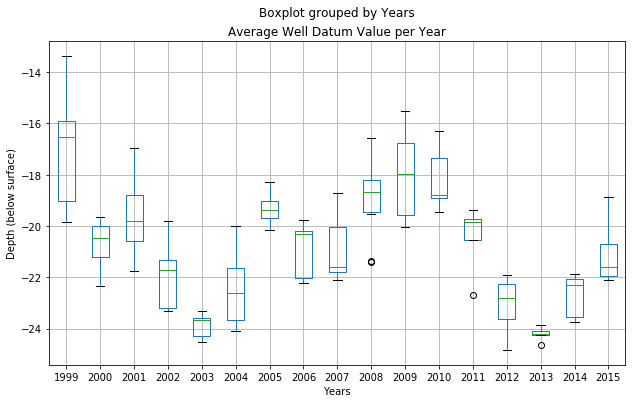

In [10]:
ax1 = dftotal_Lawrence[['depth_va_from_surface', 'Years']].boxplot(by='Years', figsize=(10, 6))
ax1.set_xlabel('Years')
ax1.set_ylabel('Depth (below surface)')
ax1.set_title('Average Well Datum Value per Year')

In [11]:
df_years_Lawrence = dftotal_Lawrence.groupby('Years', as_index=False).mean()
df_years_Lawrence.head(5) 

,Years,sl_lev_va,depth_va_from_surface,alt_va
0,1999,813.259518,-17.030482,830.29
1,2000,809.583016,-20.706984,830.29
2,2001,810.633846,-19.656154,830.29
3,2002,808.350909,-21.939091,830.29
4,2003,806.394286,-23.895714,830.29


## Importing and merging data for other wells (Ft. Riley and Hays Alluvial Aquifers)

In [12]:
file_Riley = "/Users/brewaterman/Desktop/USGS Files/gwlevels706.txt"
df = pd.read_csv(file_Riley, sep='\t', comment='#')
wellData_Riley = df.drop(0)

In [13]:
#Changing data types
wellData_Riley = wellData_Riley.astype({"sl_lev_va" : float})

level_date_Riley = pd.to_datetime(wellData_Riley["lev_dt"])

#only need years
level_date_Riley = level_date_Riley.dt.year 

#adding years back into dataframe
wellData_Riley.insert(4, "Years", level_date_Riley)

In [14]:
file2 = "/Users/brewaterman/Desktop/USGS Files/Riley2"
df2 = pd.read_csv(file2, sep = "\t", comment = "#")
wellInfo_Riley = df2.drop(0)

#changing data type
wellInfo_Riley = wellInfo_Riley.astype({"alt_va": float})

#merging the info data file with the well level data file
dftotal_Riley = pd.merge(wellData_Riley, wellInfo_Riley, on="site_no", how='outer')

In [15]:
#calculating depth from surface for Riley well
depthfromSurface_Riley = (dftotal_Riley.alt_va - dftotal_Riley.sl_lev_va)

#adding that value into df
dftotal_Riley.insert(9, "depth_va_from_surface", -depthfromSurface_Riley)  

In [16]:
#Making new data frame for Riley Well
df_years_Riley = dftotal_Riley.groupby('Years', as_index=False).mean()

Text(0.5, 1.0, 'Average Well Datum Value per Year')

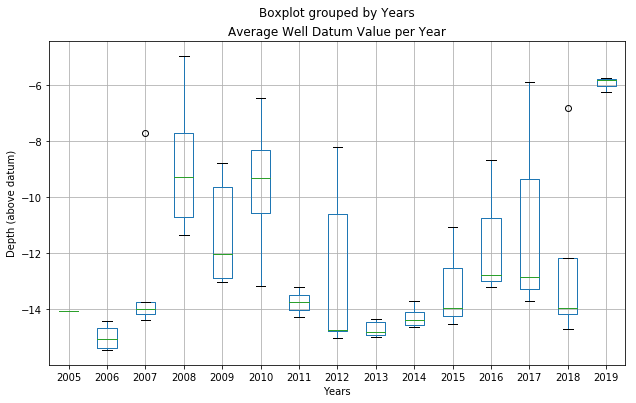

In [17]:
ax1 = dftotal_Riley[['depth_va_from_surface', 'Years']].boxplot(by='Years', figsize=(10, 6))
ax1.set_xlabel('Years')
ax1.set_ylabel('Depth (above datum)')
ax1.set_title('Average Well Datum Value per Year')

### Adding third well (Hays)

In [18]:
file_Hays = "/Users/brewaterman/Desktop/USGS Files/gwlevelst17.txt"
df3 = pd.read_csv(file_Hays, sep='\t', comment='#')
wellData_Hays = df3.drop(0)

In [19]:
#changing data types
wellData_Hays = wellData_Hays.astype({"sl_lev_va" : float})

level_date_Hays = pd.to_datetime(wellData_Hays["lev_dt"])

#only need years
level_date_Hays = level_date_Hays.dt.year 

#adding years back to dataframe
wellData_Hays.insert(4, "Years", level_date_Hays)

In [20]:
#importing data file with info for Hays well
file3 = "/Users/brewaterman/Desktop/USGS Files/hayst17"
df4 = pd.read_csv(file3, sep = "\t", comment = "#")
wellInfo_Hays = df4.drop(0)

In [21]:
#Changing data types
wellInfo_Hays = wellInfo_Hays.astype({"alt_va": float})

#Merging well info data with gw level data
dftotal_Hays = pd.merge(wellData_Hays, wellInfo_Hays, on="site_no", how='outer')

In [22]:
#Calculating well level as depth from surface
depthfromSurface_Hays = (dftotal_Hays.alt_va - dftotal_Hays.sl_lev_va)

#adding that value into df
dftotal_Hays.insert(9, "depth_va_from_surface", -depthfromSurface_Hays)  

In [23]:
#Making new dataframe for Hays well
df_years_Hays = dftotal_Hays.groupby('Years', as_index=False).mean()

Text(0.5, 1.0, 'Average Well Datum Value per Year')

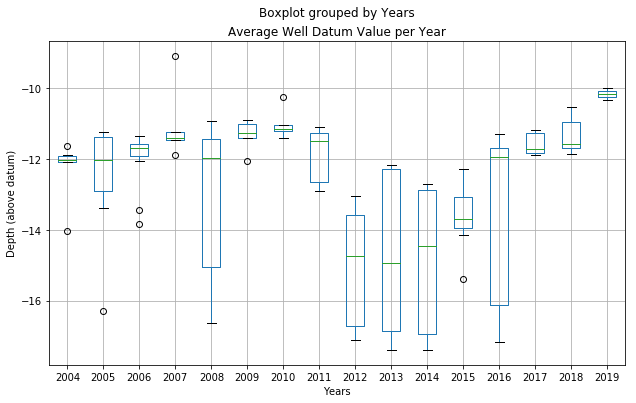

In [24]:
ax1 = dftotal_Hays[['depth_va_from_surface', 'Years']].boxplot(by='Years', figsize=(10, 6))
ax1.set_xlabel('Years')
ax1.set_ylabel('Depth (above datum)')
ax1.set_title('Average Well Datum Value per Year')

## Merging all three of new dataframes

In [25]:
df = pd.merge(df_years_Lawrence, df_years_Riley, on="Years", how='outer')
dftot = pd.merge(df, df_years_Hays, on="Years", how='outer')

#droping Nans to compare same years (2005 - 2015)
df_final = dftot.dropna()
df_final

,Years,sl_lev_va_x,depth_va_from_surface_x,alt_va_x,sl_lev_va_y,depth_va_from_surface_y,alt_va_y,sl_lev_va,depth_va_from_surface,alt_va
6,2005,810.997500,-19.292500,830.29,1144.680000,-14.040000,1158.72,1889.493846,-12.376154,1901.87
7,2006,809.338889,-20.951111,830.29,1143.735000,-14.985000,1158.72,1889.867500,-12.002500,1901.87
8,2007,809.440000,-20.850000,830.29,1145.932000,-12.788000,1158.72,1890.852000,-11.018000,1901.87
9,2008,811.379000,-18.911000,830.29,1149.846667,-8.873333,1158.72,1888.838333,-13.031667,1901.87
10,2009,812.318000,-17.972000,830.29,1147.458571,-11.261429,1158.72,1890.553333,-11.316667,1901.87
11,2010,812.147143,-18.142857,830.29,1149.157500,-9.562500,1158.72,1890.824286,-11.045714,1901.87
12,2011,809.852500,-20.437500,830.29,1144.973333,-13.746667,1158.72,1889.960000,-11.910000,1901.87
13,2012,807.195000,-23.095000,830.29,1146.052000,-12.668000,1158.72,1886.855000,-15.015000,1901.87
14,2013,806.076000,-24.214000,830.29,1144.016000,-14.704000,1158.72,1887.123750,-14.746250,1901.87
15,2014,807.554286,-22.735714,830.29,1144.445000,-14.275000,1158.72,1886.984000,-14.886000,1901.87


### GW Level Visualization 
   * New df has all wells to create visuals for comparing multiple wells at once

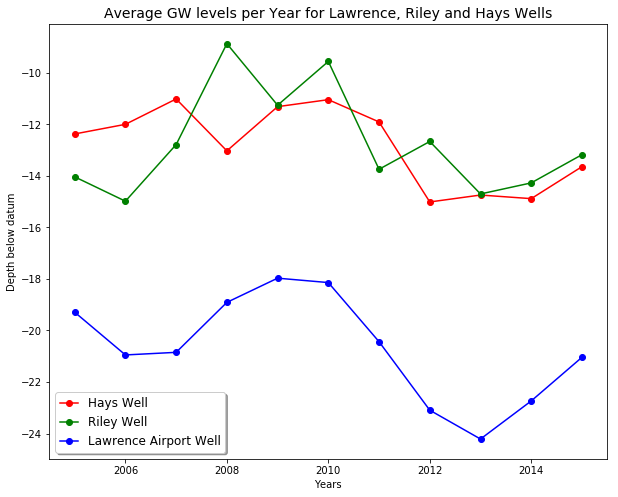

In [74]:
plt.figure(figsize =(10,8))
plt.plot(df_final['Years'],df_final['depth_va_from_surface'], '-ro')
plt.plot(df_final['Years'],df_final['depth_va_from_surface_y'], '-go')
plt.plot(df_final['Years'],df_final['depth_va_from_surface_x'], '-bo')

#plt.plot(df_final['Years'],df_final['alt_va_x'], '--k')
#plt.plot(df_final['Years'],df_final['alt_va_y'], '--k')
#plt.plot(df_final['Years'],df_final['alt_va'], '--k')

plt.legend(('Hays Well', 'Riley Well', 'Lawrence Airport Well', 'Well surface elev.'),
           shadow=True, loc="lower left", handlelength=1.5, fontsize=12)

plt.xlabel("Years")
plt.ylabel("Depth below datum")


plt.title("Average GW levels per Year for Lawrence, Riley and Hays Wells",fontsize= 14)
plt.savefig('allwells.png')
plt.show()

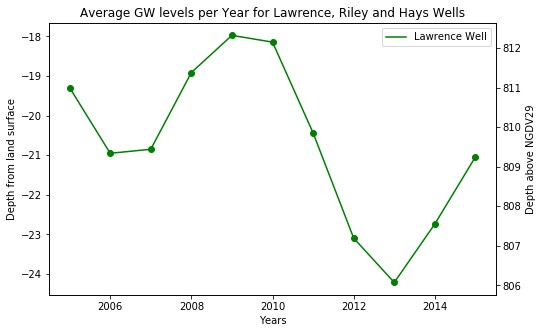

In [43]:
plt.figure(figsize =(8,5))

ax1 = plt.subplot()
ax1.plot(df_final['Years'],df_final['depth_va_from_surface_x'], 'go', label ="Lawrence Well")

ax2 = ax1.twinx() #so they share
ax2.plot(df_final['Years'],df_final['sl_lev_va_x'], '-g', label ="Lawrence Well")



plt.legend(loc='best')
ax1.set_xlabel("Years")
ax1.set_ylabel("Depth from land surface")
ax2.set_ylabel("Depth above NGDV29")

plt.title("Average GW levels per Year for Lawrence, Riley and Hays Wells")
plt.savefig('fthayst17.png')
plt.show()



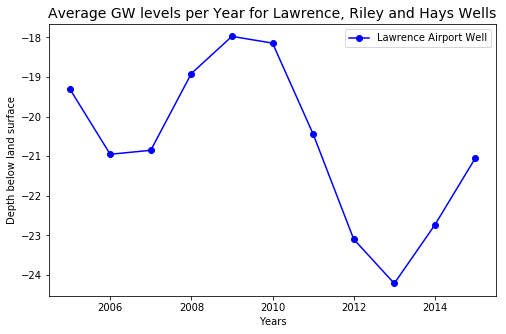

In [59]:
plt.figure(figsize =(8,5))

#plt.plot(df_final['Years'],df_final['alt_va_x'], '--k', label ="Surface elev.")
plt.plot(df_final['Years'],df_final['depth_va_from_surface_x'], '-bo', label ="Lawrence Airport Well")

plt.legend(loc='best')
#plt.legend((shadow=True, loc="best", handlelength=1.5, fontsize=12)
plt.xlabel("Years")
plt.ylabel("Depth below land surface")

plt.title("Average GW levels per Year for Lawrence, Riley and Hays Wells", fontsize= 14)
plt.savefig('lawrence.png')
plt.show()

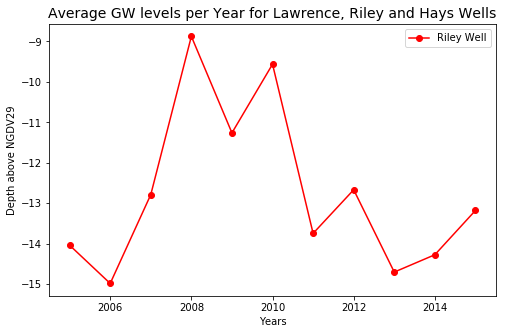

In [61]:
plt.figure(figsize =(8,5))

#plt.plot(df_final['Years'],df_final['alt_va_y'], '--k', label ="Surface elev.")
plt.plot(df_final['Years'],df_final['depth_va_from_surface_y'], '-ro', label = "Riley Well")

plt.legend(loc='best')
plt.xlabel("Years")
plt.ylabel("Depth above NGDV29")

plt.title("Average GW levels per Year for Lawrence, Riley and Hays Wells", fontsize= 14)
plt.savefig('riley.png')
plt.show()

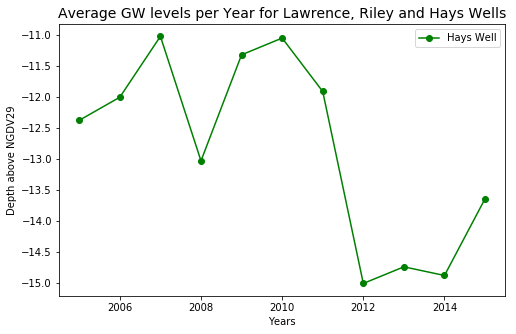

In [70]:
plt.figure(figsize =(8,5))

#plt.plot(df_final['Years'],df_final['alt_va'], '--k', label ="Surface elev.")
plt.plot(df_final['Years'],df_final['depth_va_from_surface'], '-go', label ="Hays Well")


plt.legend(loc = 'best')
plt.xlabel("Years")
plt.ylabel("Depth above NGDV29")

plt.title("Average GW levels per Year for Lawrence, Riley and Hays Wells", fontsize= 14)
plt.savefig('hays.png')
plt.show()

* Generate gif and save to compare all three wells

In [71]:
import imageio
import glob
import os

In [32]:
imgs = "/Users/brewaterman/Desktop/GroundwaterVariation" #assigns variable
glob.os.chdir(imgs)

In [73]:
imgFiles = []
for file in glob.glob("*.png"):
    print(file)
    imgFiles.append(imageio.imread(file))
imageio.mimsave('gwvariation2.gif', imgFiles, duration = .75)

lawrence.png
riley.png
hays.png


### Results:

 * GW levels decreased over time for Lawrence and Hays wells, increased for Riley well
 * Greatest depth from surface was actually at Lawrence (well that is furthest east)
 
### Challenges
    
 * USGS (#'s, having to pull out multiple files to get info about individual well)
 * Trying to get graphs in 'normal' format 
 * .gif 
 
### Benefits of project
 * Working with USGS/big data
 * 